### Feature Importances

En este Notebook calcularemos el feature_importances utilizando el módulo RandomForestClassifier.

La intención de esta técnica es poder identificar las 5 columnas con más importantes, ya que buscaremos entrenar los modelos con datos más significativos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_clean = pd.read_csv("02_clean_cybersecurity_attacks.csv")
df = pd.read_csv("03_codif_cybersecurity_attacks.csv")
pd.options.display.max_columns = None

In [3]:
df_clean

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Firewall Logs,Log Source,Trimestre,Localidad,Region
0,31225,17616,ICMP,503,Data,HTTP,Log Data,28.67,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0,Segment A,Log Data,Server,2,Jamshedpur,Sikkim
1,17245,48166,ICMP,1174,Data,HTTP,Log Data,51.50,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0,Segment B,Log Data,Firewall,3,Bilaspur,Nagaland
2,16811,53600,UDP,306,Control,HTTP,Log Data,87.42,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0,Segment C,Log Data,Firewall,4,Bokaro,Rajasthan
3,20018,32534,UDP,385,Data,HTTP,IoC No Detected,15.79,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0,Segment B,No Log Data,Firewall,3,Jaunpur,Rajasthan
4,6131,26646,TCP,1462,Data,DNS,IoC No Detected,0.52,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0,Segment C,No Log Data,Firewall,3,Anantapur,Tripura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,31005,6764,UDP,1428,Control,HTTP,Log Data,39.28,DDoS,Known Pattern A,Logged,Medium,Adira Madan,Mozilla/5.0,Segment A,Log Data,Firewall,2,Nashik,Manipur
39996,2553,28091,UDP,1184,Control,HTTP,Log Data,27.25,DDoS,Known Pattern A,Logged,High,Rati Dara,Mozilla/5.0,Segment C,Log Data,Firewall,1,Vadodara,Mizoram
39997,22505,25152,UDP,1043,Data,DNS,Log Data,31.01,DDoS,Known Pattern B,Blocked,Low,Samiha Joshi,Mozilla/5.0,Segment C,Log Data,Server,1,Mahbubnagar,Himachal Pradesh
39998,20013,2703,UDP,483,Data,FTP,Log Data,97.85,Malware,Known Pattern B,Ignored,Low,Rasha Chauhan,Mozilla/5.0,Segment B,Log Data,Server,3,Rourkela,Arunachal Pradesh


In [4]:
df.describe(include='all')

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Firewall Logs,Log Source,Trimestre,Localidad,Region
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,14846.045125,14937.349175,0.996750,717.452725,0.494075,0.999600,0.500975,4931.142925,0.996975,0.498100,0.991650,1.001325,16200.331800,18.127175,1.003375,0.499025,0.497100,1.429150,156.811275,13.497175
std,8573.698265,8626.349964,0.817439,416.044192,0.499971,0.817567,0.500005,2835.100967,0.817547,0.500003,0.817341,0.818804,9361.812604,43.032228,0.816719,0.500005,0.499998,1.085246,91.434115,8.082773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7406.750000,7453.750000,0.000000,356.000000,0.000000,0.000000,0.000000,2482.000000,0.000000,0.000000,0.000000,0.000000,8078.750000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,6.000000
50%,14872.500000,14895.500000,1.000000,718.000000,0.000000,1.000000,1.000000,4955.500000,1.000000,0.000000,1.000000,1.000000,16198.500000,0.000000,1.000000,0.000000,0.000000,1.000000,156.000000,13.000000
75%,22217.250000,22420.000000,2.000000,1079.000000,1.000000,2.000000,1.000000,7385.000000,2.000000,1.000000,2.000000,2.000000,24309.250000,0.000000,2.000000,1.000000,1.000000,2.000000,237.000000,20.000000
max,29760.000000,29894.000000,2.000000,1436.000000,1.000000,2.000000,1.000000,9825.000000,2.000000,1.000000,2.000000,2.000000,32388.000000,180.000000,2.000000,1.000000,1.000000,3.000000,315.000000,27.000000


In [5]:
# calculamos feature_importances con el módulo RandomForestClassifier, destacaremos las columnas con importancia menor al 20%.
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Action Taken', axis=1)
y = df['Action Taken']

feature_rf = RandomForestClassifier()
feature_rf.fit(X, y)
column_names = ['Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Firewall Logs', 'Log Source', 'Trimestre', 'Localidad', 'Region']

importances = feature_rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = [column_names[i] for i in indices]

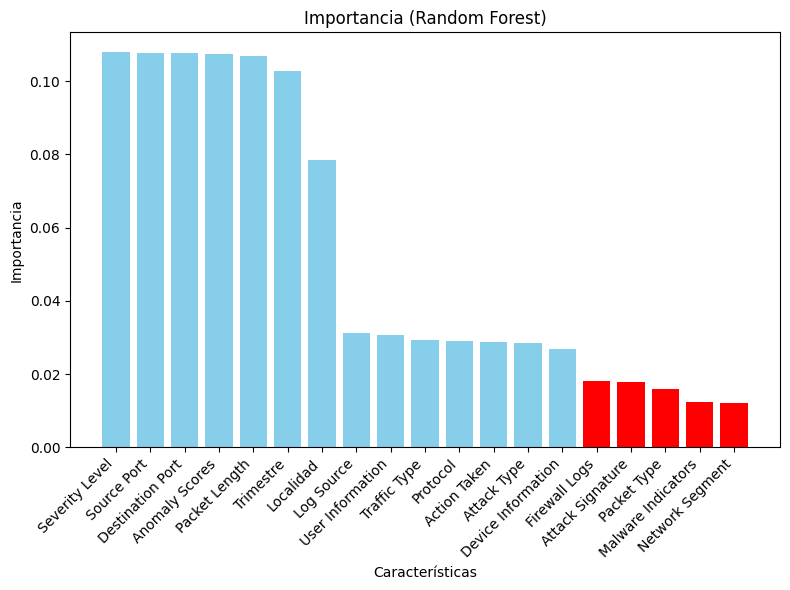

In [6]:
colors = ['red' if imp < 0.02 else 'skyblue' for imp in sorted_importances]
plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_importances, color= colors)
plt.xticks(rotation=45, ha='right')
plt.title("Importancia (Random Forest)")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

In [7]:
X = df.drop('Severity Level', axis=1)
y1 = df['Severity Level']

feature_rf = RandomForestClassifier()
feature_rf.fit(X, y1)
column_names = ['Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Firewall Logs', 'Log Source', 'Trimestre', 'Localidad', 'Region']

importances = feature_rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = [column_names[i] for i in indices]

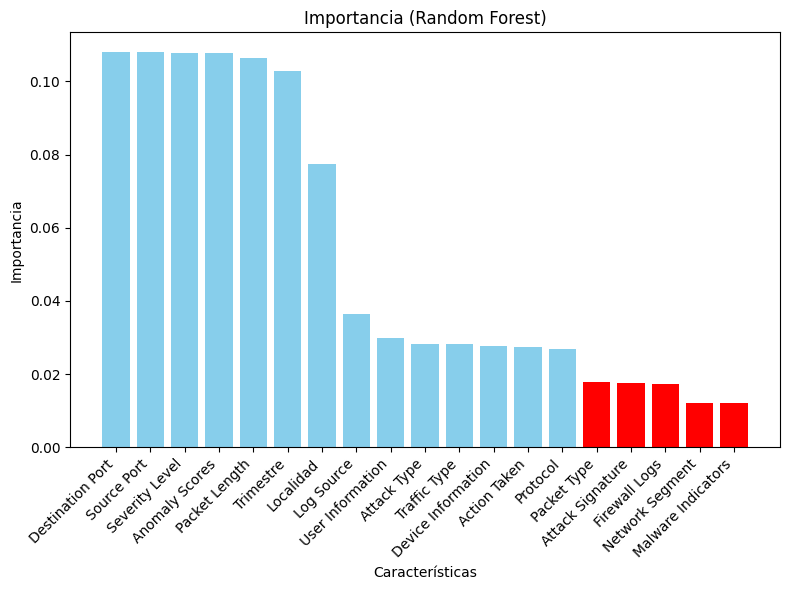

In [8]:
colors = ['red' if imp < 0.02 else 'skyblue' for imp in sorted_importances]
plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_importances, color= colors)
plt.xticks(rotation=45, ha='right')
plt.title("Importancia (Random Forest)")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

In [9]:
X = df.drop('Attack Type', axis=1)
y2 = df['Attack Type']

feature_rf = RandomForestClassifier()
feature_rf.fit(X, y2)
column_names = ['Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Firewall Logs', 'Log Source', 'Trimestre', 'Localidad', 'Region']

importances = feature_rf.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_features = [column_names[i] for i in indices]

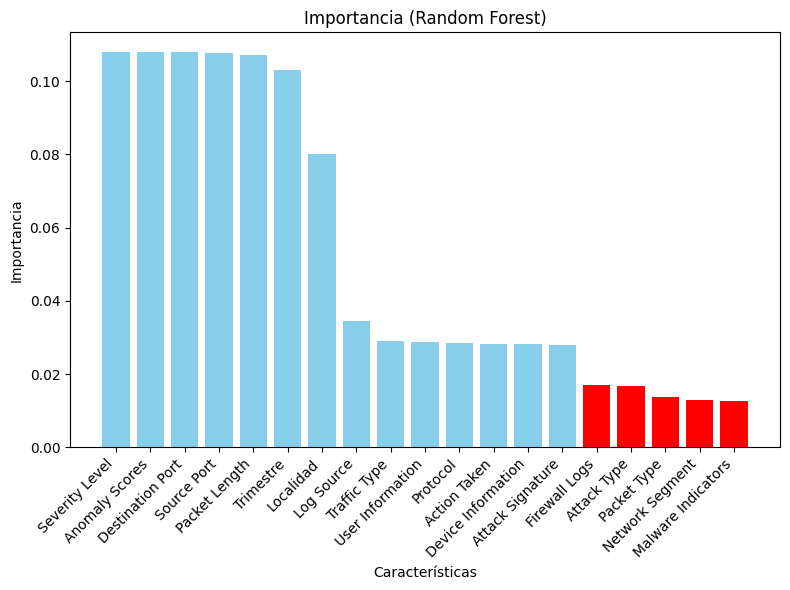

In [10]:
colors = ['red' if imp < 0.02 else 'skyblue' for imp in sorted_importances]
plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_importances, color= colors)
plt.xticks(rotation=45, ha='right')
plt.title("Importancia (Random Forest)")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

In [11]:
# definimos las siguiente columnas para el entrenamiento del modelo (desde el df codificado).
df = df[['Action Taken','Severity Level','Attack Type','Destination Port','Source Port','Anomaly Scores','Packet Length','Localidad']]
df

,Action Taken,Severity Level,Attack Type,Destination Port,Source Port,Anomaly Scores,Packet Length,Localidad
0,2,1,2,7709,14137,2827,439,134
1,0,1,2,21888,7587,5070,1110,60
2,1,1,0,24463,7388,8595,242,61
3,0,2,2,14681,8913,1556,321,135
4,0,1,0,11942,2365,50,1398,20
...,...,...,...,...,...,...,...,...
39995,2,2,0,2665,14033,3870,1364,210
39996,2,0,0,12634,731,2687,1120,307
39997,0,1,0,11250,10087,3058,979,178
39998,1,1,2,774,8909,9613,419,252


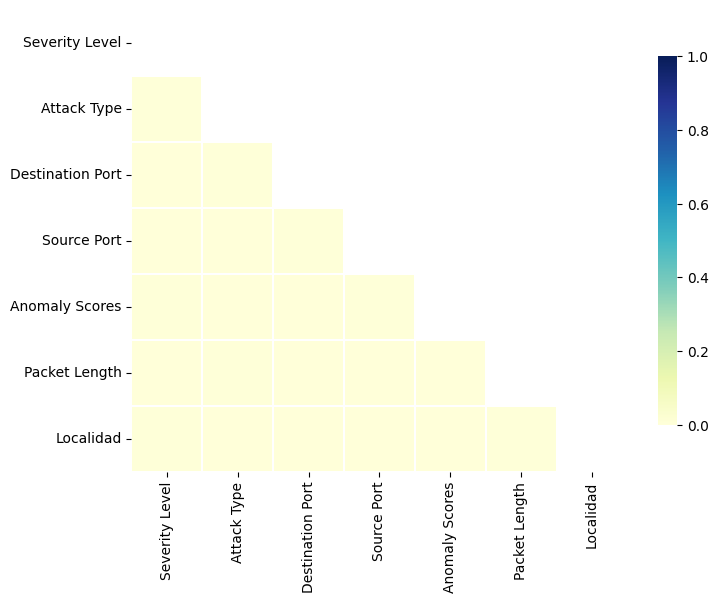

In [12]:
# graficaremos en el diagrama de heatmap la correlación entre columnas, nos ayudará a determinar si es necesario prescindir de más columnas.
import seaborn as sns
corr = np.abs(df.drop(['Action Taken'], axis=1).corr())
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

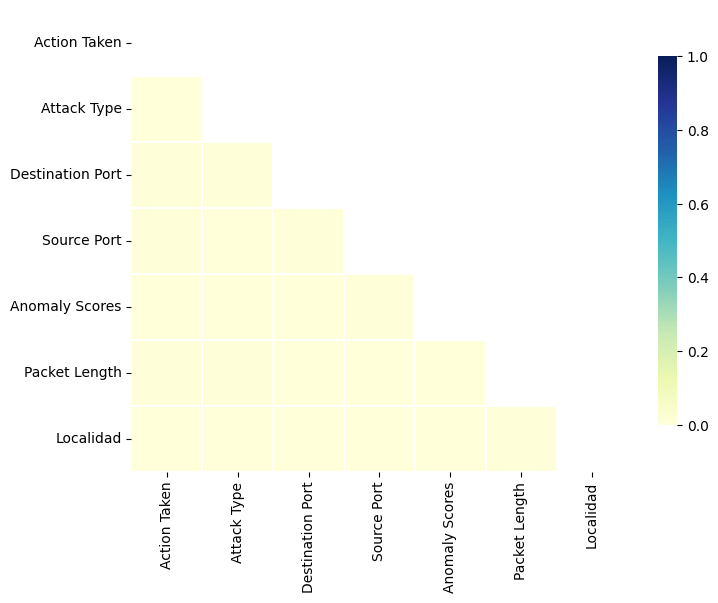

In [13]:
corr = np.abs(df.drop(['Severity Level'], axis=1).corr())
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

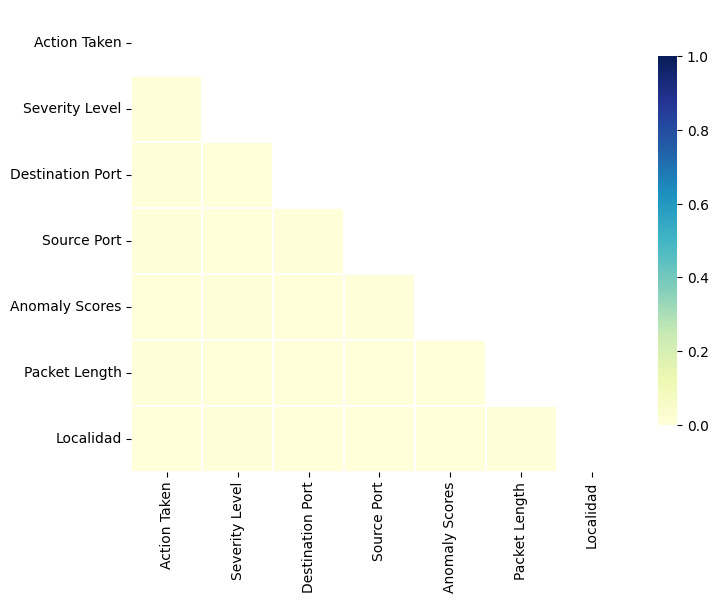

In [14]:
corr = np.abs(df.drop(['Attack Type'], axis=1).corr())
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})
plt.show()

No tenemos correlación alta entre las columnas seleccionadas, por lo que avanzaremos con los datos previstos.

In [15]:
# guardamos el dataset feature_importances para entrenar los modelos con un nuevo análisis de datos.

df.to_csv('./08_feature_importances.csv', sep=',', index=False)